#1. Importing packages





In [1]:
#data manipulation libraries
import pandas as pd
import numpy as np

#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


##Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, accuracy_score

In [2]:
df=pd.read_csv('loan_applicant_data.csv') #reading the data source


#2.  **Model Building**

**Checking data columns**

In [3]:
df.head()

,Unnamed: 0,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,...,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,Loan_amount_range,applicant_age_range
0,0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,...,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0,NaN,60-70
1,1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,...,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1,NaN,20-30
2,2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,...,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0,NaN,40-50
3,3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,...,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0,NaN,40-50
4,4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,...,4870000,3,car or other,0,0,2,delay in paying off loans in the past,1,NaN,50-60


**Removing irrelevant columns**

In [4]:
df1=df.drop('applicant_id',axis=1)
df_dummies = pd.get_dummies(df1, drop_first=True)
df_dummies.head()

,Unnamed: 0,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,...,Loan_history_existing loans paid back duly till now,Loan_history_no loans taken/all loans paid back duly,Loan_amount_range_Low,Loan_amount_range_Medium,applicant_age_range_20-30,applicant_age_range_30-40,applicant_age_range_40-50,applicant_age_range_50-60,applicant_age_range_60-70,applicant_age_range_70-80
0,0,67,1,4,1,6,1169000,4,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,22,1,2,1,48,5951000,2,0,0,...,1,0,0,0,1,0,0,0,0,0
2,2,49,2,3,1,12,2096000,2,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,45,2,4,1,42,7882000,2,0,1,...,1,0,0,0,0,0,1,0,0,0
4,4,53,2,4,1,24,4870000,3,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df['high_risk_applicant']=df['high_risk_applicant'].astype(int)

Changing Target column to numerical for Machine learning algorithm

In [6]:

df_dummies = pd.get_dummies(df,drop_first=True)
df_dummies.head()

,Unnamed: 0,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,...,Loan_history_existing loans paid back duly till now,Loan_history_no loans taken/all loans paid back duly,Loan_amount_range_Low,Loan_amount_range_Medium,applicant_age_range_20-30,applicant_age_range_30-40,applicant_age_range_40-50,applicant_age_range_50-60,applicant_age_range_60-70,applicant_age_range_70-80
0,0,1469590,67,1,4,1,6,1169000,4,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1203873,22,1,2,1,48,5951000,2,0,...,1,0,0,0,1,0,0,0,0,0
2,2,1432761,49,2,3,1,12,2096000,2,0,...,0,0,0,0,0,0,1,0,0,0
3,3,1207582,45,2,4,1,42,7882000,2,0,...,1,0,0,0,0,0,1,0,0,0
4,4,1674436,53,2,4,1,24,4870000,3,0,...,0,0,0,0,0,0,0,1,0,0


Creating dummy variables for algorithm.

**Feature Engineering**

In [7]:
features = df_dummies.drop(['high_risk_applicant'], axis =1)
target =df_dummies['high_risk_applicant']

Extracting cateogrical features, and storing target column in a separate variable.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(features)

StandardScaler()

Scaling features to make them better fit to the model.

In [9]:
x = scaler.fit_transform(features) #scalar transformation complete

In [10]:
from sklearn.model_selection import train_test_split #train test split module

In [11]:
X_train, X_test , y_train, y_test = train_test_split(x, target , test_size=0.3, random_state=45)

Data split into training and testing cateogry in 70/30 ratio.

#3. **Logistic Regression**

In [12]:
Logit_Model = LogisticRegression() #store logistic regression algorithm in variable
Logit_Model.fit(X_train,y_train) #fitting training dataset

LogisticRegression()

Training dataset fit into Logistic regression model

**3.1 Hyper Parameter tuning**

In [13]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore') #all warnngs to be ignored
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [14]:

clf = GridSearchCV(Logit_Model,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

In [15]:
clf.fit(X_train,y_train) #fitting our training dataset 

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [16]:
print("Tuned Hyperparameters :", clf.best_params_) #priniting best parameters and score
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.7342857142857143


In [17]:
Logit_Model = LogisticRegression(C = 0.1, 
                            penalty = 'l2', 
                            solver = 'liblinear') #setting parameter range
Logit_Model.fit(X_train,y_train) #fitting training data to tuned model
y_pred_proba = Logit_Model.predict_proba(X_test)

y_pred = np.where(y_pred_proba[:,0]>0.7, 0, 1) #if predicted value is greater than 0.7, then 0 otherwise 1

To minimise false negatives, we have set probability threshold for 0 to 0.7. If probability of 0 is greater than 0 then the prediction value will be 0, otherwise it will be 1.

**3.2 Confusion Matrix**

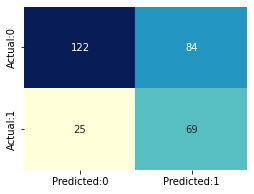

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (4,3))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

After adjusting the probability threshold we can see that the number of false negatives has decreased.

In [19]:
Report =classification_report(y_test, y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.83      0.59      0.69       206
           1       0.45      0.73      0.56        94

    accuracy                           0.64       300
   macro avg       0.64      0.66      0.62       300
weighted avg       0.71      0.64      0.65       300



# 4. SVC

In [20]:
SVCmodel = SVC() #setting SVC algorithm
SVCmodel.fit(X_train, y_train) #fitting training dataset



SVC()

4.1 HyperParameter Tuning

In [21]:

  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [22]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.0001)


In [23]:
ysvc_predict = grid.predict(X_test) #predicting model with
  


**4.2 Confusion Matrix and Report**

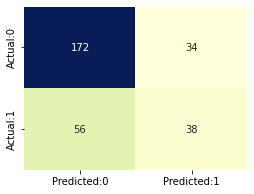

In [24]:

# compute the confusion matrix
cm = confusion_matrix(y_test,ysvc_predict)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (4,3))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [25]:
result = classification_report(y_test,ysvc_predict)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       206
           1       0.53      0.40      0.46        94

    accuracy                           0.70       300
   macro avg       0.64      0.62      0.63       300
weighted avg       0.68      0.70      0.69       300



# 5. Naive Bayes

In [26]:


#setting Naive Bayes variable
GNB = GaussianNB()



# fit the model
GNB.fit(X_train, y_train)


GaussianNB()

5.1 HyperParameter Tuning

In [27]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=GNB, 
                 param_grid=params_NB,     
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 1.0}

In [28]:
ynb_predict=gs_NB.predict(X_test)

5.2 Confusion Matrix and Report

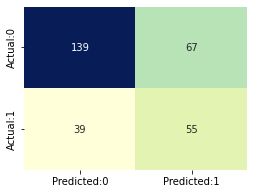

In [29]:
cm = confusion_matrix(y_test,ynb_predict)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (4,3))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [30]:
result = classification_report(y_test,ynb_predict)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.78      0.67      0.72       206
           1       0.45      0.59      0.51        94

    accuracy                           0.65       300
   macro avg       0.62      0.63      0.62       300
weighted avg       0.68      0.65      0.66       300



# 6. Conclusion

After checking Confusion Matrix and Crossvalidation Reports from 3 Classification Algorithms, we can conclude that:



1.   Logistic Regression has The recall value for  high rish candidates is higher. This suggests that number of false negative is low. Hence this model is good for our Business Constraint. 
2.   SVC has comparitively higher number of false negatives and low recall score for high risk candidates. It is preferrable to not use this model considering our Business Constraints.
3.Naive Bayes has fewer false negatives compared to SVC. It has higher accuracy compared to Logistic Regression model.

Considering all the above facts, since the primary objective is to have fewer false negatives compared rather than higher accuracy, we should prefer Logistic Regression as the best model for this dataset.

